In [5]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

In [6]:
dataset_name = 'tourism'
dataset = tsag.preprocessing.PreprocessDatasets(dataset_name)
groups = dataset.apply_preprocess()

In [ ]:
# Store original results

for transf in ['jitter', 'time_warp', 'magnitude_warp', 'scaling']:
    algorithm = 'gpf'
    gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups)
    model, like = gpf_model.train()
    mean, lower, upper = gpf_model.predict(model, like)
    res = gpf_model.metrics(mean)
    gpf_model.store_metrics(res)

    algorithm = 'mint'
    mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', 
                           groups=groups, 
                           aggregate_key = '(State / Zone / Region) * Purpose')
    forecasts = mint.train()
    results = mint.results(forecasts)
    res = mint.metrics(results)
    mint.store_metrics(res)

    algorithm = 'deepar'
    deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups=groups)
    model = deepar.train()
    forecasts = deepar.predict(model)
    results = deepar.results(forecasts)
    res = deepar.metrics(results)
    deepar.store_metrics(res)

In [7]:
data = tsag.transformations.CreateTransformedVersions(dataset_name)
data.parameters = {"jitter": 1.2,
                   "scaling": 0.2,
                   "magnitude_warp": 0.1,
                   "time_warp": 0.001}

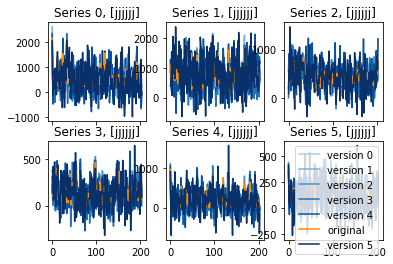

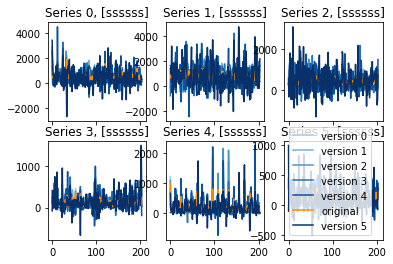

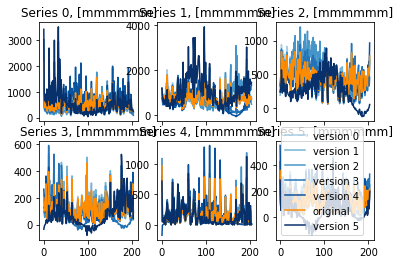

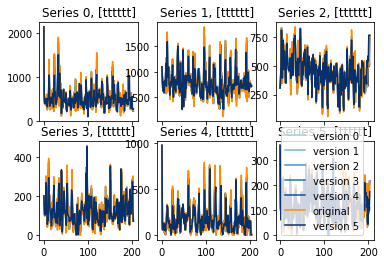

In [8]:
data.create_new_version_single_transf()

In [ ]:
vis = tsag.visualization.Visualizer(dataset_name)

In [ ]:
algorithm = 'gpf'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)

In [ ]:
algorithm = 'mint'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', 
                                   groups=groups,
                                   aggregate_key = '(State / Zone / Region) * Purpose')
            forecasts = mint.train()
            results = mint.results(forecasts)
            res = mint.metrics(results)
            mint.store_metrics(res)

In [ ]:
algorithm = 'deepar'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            model = deepar.train()
            forecasts = deepar.predict(model)
            results = deepar.results(forecasts)
            res = deepar.metrics(results)
            deepar.store_metrics(res)